# Two variable continuous *x* and *y* in `matplotlib` and `seaborn` <img src="images/JHI_STRAP_Web.png" style="width: 150px; float: right;">

<div class="alert alert-success">
<h2>Introduction</h2>
</div>

This notebook exercise will describe visualisation of one-dimensional continuous data in `Python`, using the `matplotlib` and `seaborn` libraries.

For these examples, we will work with data concerning airline safety from the `FiveThirtyEight` article:

* Should Travelers Avoid Flying Airlines That Have Had Crashes in the Past?: [link](http://fivethirtyeight.com/features/should-travelers-avoid-flying-airlines-that-have-had-crashes-in-the-past/)

This data is located in the file `data/airline-safety.csv`, in the root repository. We will look at the relationship between 'incidents' and 'fatalities' in the two 14-year periods: 1985-1999, and 2000-2014, to visualise (and maybe infer) whether there appears to be a relationship between the two, and perhaps a predictive relationship.

![continuous x, y data example](images/intro_image_continuous_xy.png)

#### Python imports

To set up `pylab`, we run the *magic*:

```python
%pylab inline
```

and we import `seaborn` and `pandas` into the namespaces `sns` and `pd`:

```python
import seaborn as sns
import pandas as pd
```

To do regression later on, we import `scipy.stats` as `stats`:

```python
from scipy import stats
```

We will suppress warnings:

```python
import warnings
warnings.filterwarnings('ignore')
```

In [1]:
# Use the pylab magic and import seaborn
%pylab inline

import seaborn as sns
import pandas as pd
from scipy import stats

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Learning Outcomes

* Representing two-dimensional continuous *x* and *y* data using `matplotlib` and `seaborn` libraries
* Use of `figure()` and subplots
* Annotating plots with text
* Working with long and wide form DataFrame
* Using statistical overlays and `seaborn`'s statistical plots

<div class="alert alert-success">
<h2>Exercise</h2>
</div>

<div class="alert alert-success">
<h3>1. Loading the dataset</h3>
</div>

We will load the data from `FiveThirtyEight` (downloaded from [https://github.com/fivethirtyeight](https://github.com/fivethirtyeight), which describes for a set of airlines the number of seat kilometres flown every week, and corresponding counts for incidents, fatal accidents and fatalities in the two 14-year periods 1985-1999 and 2000-2014.

* `FiveThirtyEight` data: [https://github.com/fivethirtyeight](https://github.com/fivethirtyeight)
* `pandas`: [documentation](http://pandas.pydata.org/pandas-docs/stable/)

This is located under this repository's root directory in the `data` subdirectory in comma-separated variable format, as `airline-safety.csv`. We can import this to a DataFrame in the variable `safety` using `pandas`:

```python
safety = pd.read_csv("../../data/airline-safety.csv", sep=",")
```

and we can inspect it with a number of useful DataFrame methods:

* `safety.head()`
* `safety.describe()`
* `safety.dtypes`

In [2]:
# Load the airline safety data into the variable safety
safety = pd.read_csv("../../data/airline-safety.csv", sep=",")

In [3]:
# Inspect the data set using this cell
safety.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


<div class="alert alert-success">
<h3>2. Inspecting the data</h3>
</div>

One of the more straightforward ways to gain a quick overview of continuous *x*, *y* data is with a *scatterplot*. In terms of elementary perceptual tasks, this places datapoints on a plane, with two common scales: one on the *x*-axis and one on the *y*-axis.

<div class="alert alert-warning">
Scatterplots can be converted into <i>bubble plots</i> (incorporating the perceptual task of *area comparison*) by making the size of the marker dependent on a third variable. We will not be doing this here, but see the <b>making_movies.ipynb</b> exercise for an example of this.
</div>

We will begin by drawing six subplots, in two rows of three:

* Row 1: incidents, fatal incidents and fatalities for 1985-1999
* Row 2: incidents, fatal incidents and fatalities for 2000-2014

Each subplot will contain a scatterplot, with *x*-axis equal to the number of seat kilometres flown, and the *y*-axis representing each of the datasets above.

#### Creating subplots and axis labels

There are several ways to create a subplot layout in `matplotlib`. Here, we will use the `subplots()` function. This returns a `figure()` object, and collections of subplots, nested by row. To get two rows of three subplots, we can use the following code:

```python
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = subplots(nrows=2, ncols=3, figsize=(12, 8))
```

Here, `figsize` takes a tuple of `(width, height)` for the figure, in inches.

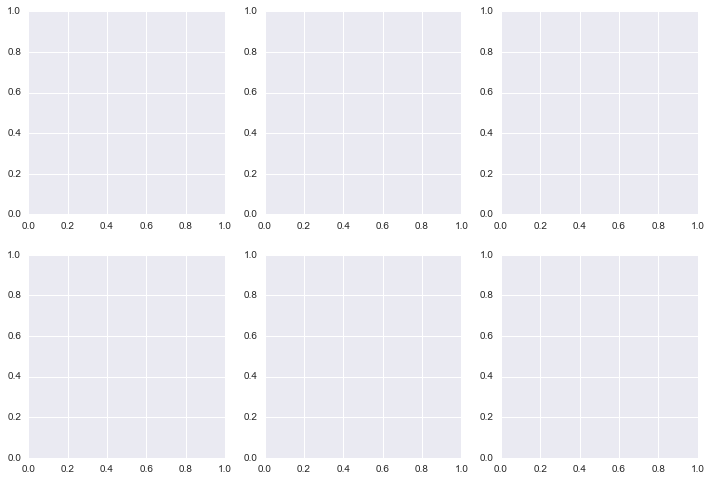

In [4]:
# Create axes in this cell, with tight_layout()
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = subplots(nrows=2, ncols=3, figsize=(12, 8));

We can refer to these subplots collectively to set *x*-axis labels, e.g. by creating the variable `axes` that holds a list of the six axes, and then looping over them to apply the *x*-axis label individually:

```python
axes = (ax1, ax2, ax3, ax4, ax5, ax6)
for ax in axes:
    ax.set_xlabel("km flown")
```

To show the modified figure, use:

```python
fig
```

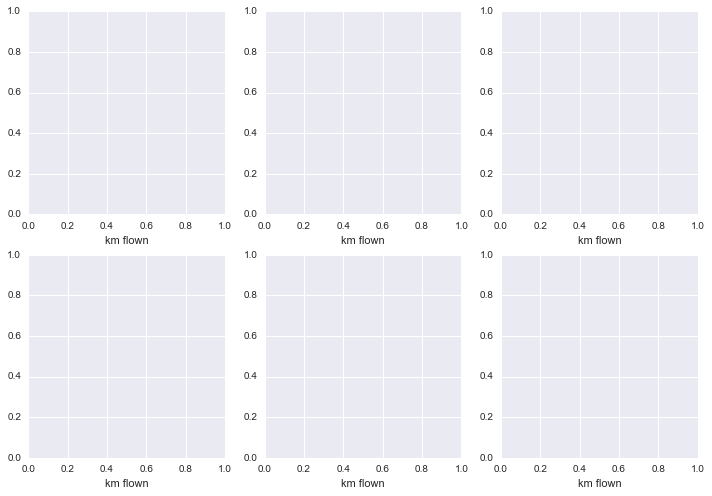

In [5]:
# Set axes xlabels in this cell
axes = (ax1, ax2, ax3, ax4, ax5, ax6)
for ax in axes:
    ax.set_xlabel("km flown")
fig

We can pair up axes to write the *y*-axis labels, similarly. This time, we pair axes in *tuples*, and associate those pairs with the corresponding *y*-axis label, in another tuple. All of these tuples are then placed in the list `ylabels`. We can then loop over the list and unpack the axes and the labels that need to be applied:

```python
ylabels = [((ax1, ax4), 'incidents'),
           ((ax2, ax5), 'fatal incidents'),
           ((ax3, ax6), 'fatalities')]
for axes, label in ylabels:
    for ax in axes:
        ax.set_ylabel(label)
```

And to get nice separation of subplots in the grid layout so that the axis labels don't overlap, we can use `fig.tight_layout()`:

```python
fig.tight_layout()
```

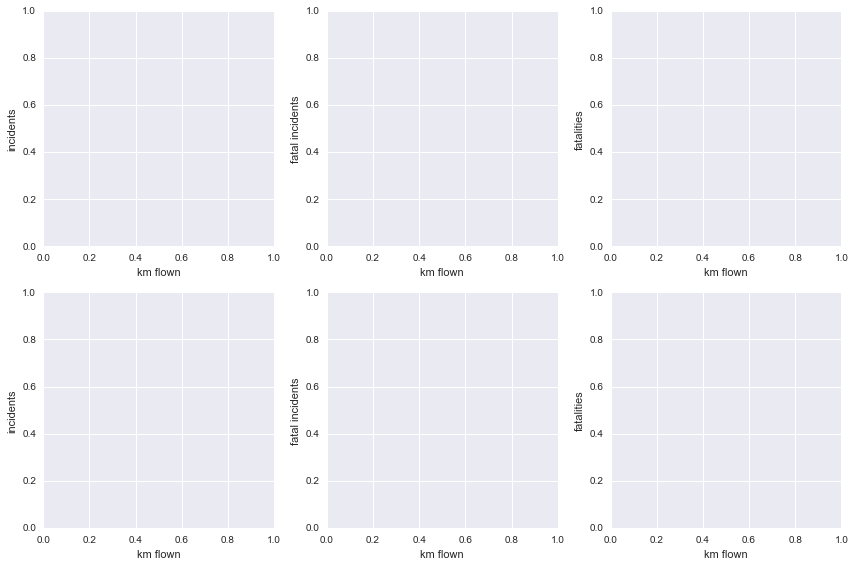

In [6]:
# Set y-axis labels in this cell
ylabels = [((ax1, ax4), 'incidents'),
           ((ax2, ax5), 'fatal incidents'),
           ((ax3, ax6), 'fatalities')]
for axes, label in ylabels:
    for ax in axes:
        ax.set_ylabel(label)
fig.tight_layout()
fig

***CHALLENGE:*** Can you set subplot titles on the top row to read `1985-1999`, and on the lower row to read `2000-2014`?

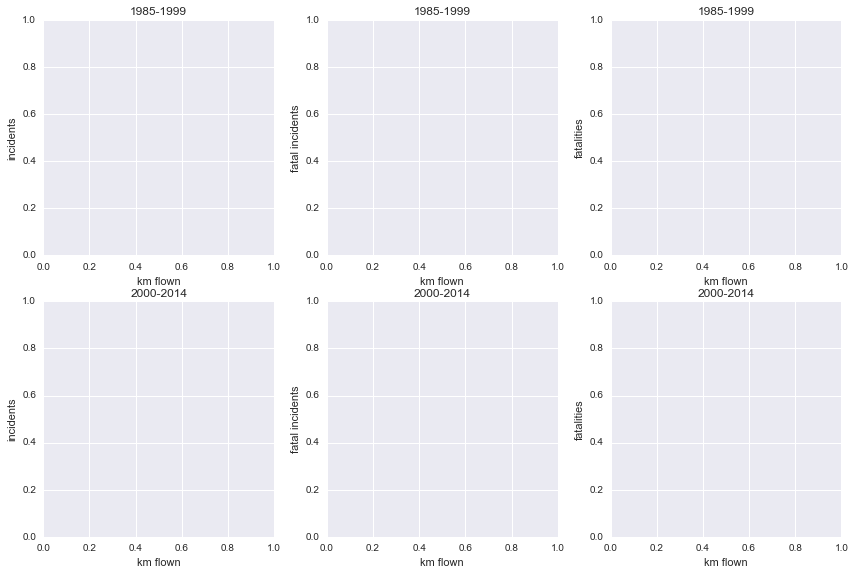

In [7]:
for ax in (ax1, ax2, ax3):
    ax.set_title('1985-1999')
for ax in (ax4, ax5, ax6):
    ax.set_title('2000-2014')    
fig

#### Plotting the data

There are seven columns in the data, and we're plotting them all on the same *x*-axes - so we loop over the six columns, putting data into the appropriate subplot.

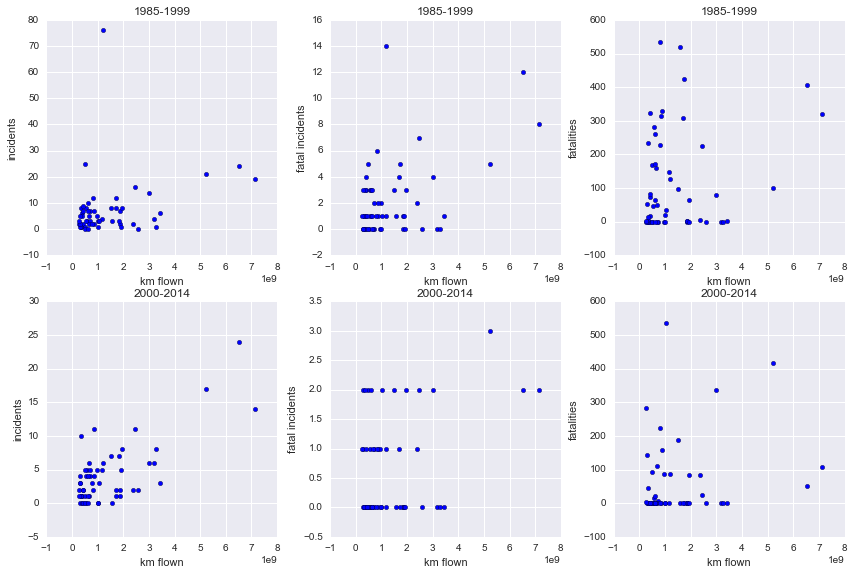

In [8]:
# Plot the data in each scatterplot
datacols = [(ax1, 'incidents_85_99'), (ax2, 'fatal_accidents_85_99'),
            (ax3, 'fatalities_85_99'), (ax4, 'incidents_00_14'),
            (ax5, 'fatal_accidents_00_14'), (ax6, 'fatalities_00_14')]
for ax, col in datacols:
    ax.scatter(safety['avail_seat_km_per_week'], safety[col])
fig

From these scatterplots we can see that the overall relationship is consistently that the more miles are flown by an airline, the more incidents of any type are seen, and:

* there is a strong outlier in 1985-1999 for number of incidents per seat km flown.
* the number of fatalities does not appear to correlate strongly with km flown
* the number of fatal incidents is small for any given airline - especially in the period 2000-2014

<div class="alert alert-success">
<h3>3. Long and wide form data, faceting</h3>
</div>

The six plots above suggest that a statistical summary plot might be useful, fitting a linear regression to each of the six subplots. We can do this using the specialist `lmplot()` in `seaborn` to replace the `matplotlib.scatter()` plots we drew above.

There's one slight niggle with this approach - we have to reconfigure our `safety` data, casting it from *wide* to *long* format, so we can use *faceting* to produce one subplot per variable type.

We do this with `pd.melt()`, a `pandas` function that lets us 'melt' all our data into a long table where all variable names are placed in a single column, and the values for those variables placed alongside in the same row.

* `pandas` function `pd.melt()`: [docs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html)
* 'melting' data: [blog post](http://www.r-bloggers.com/melt/)

To melt the data, we need to specify which column uniquely identifies data points - here it's the airline name, in columns `airline`. We want to preserve the `avail_seat_km_per_week` for plotting as *x*-data, but all other columns are data columns that we want to melt, so we can create the new DataFrame `safety_long`:

```python
safety_long = pd.melt(safety, id_vars='airline',
                      value_vars=['avail_seat_km_per_week', 'incidents_85_99',
                                  'fatal_accidents_85_99', 'fatalities_85_99',
                                  'incidents_00_14', 'fatal_accidents_00_14',
                                  'fatalities_00_14'])
```

This converts our data from a $56 \times 8$ to a $336 \times 4$ DataFrame. You can inspect the changes with:

* safety_long.head()
* safety_long.describe()
* safety_long.dtypes

In [9]:
# Melt the data and inspect the output in this cell
safety_long = pd.melt(safety, id_vars=['airline', 'avail_seat_km_per_week'],
                      value_vars=['incidents_85_99',
                                  'fatal_accidents_85_99', 'fatalities_85_99',
                                  'incidents_00_14', 'fatal_accidents_00_14',
                                  'fatalities_00_14'])
safety_long.head()

,airline,avail_seat_km_per_week,variable,value
0,Aer Lingus,320906734,incidents_85_99,2
1,Aeroflot*,1197672318,incidents_85_99,76
2,Aerolineas Argentinas,385803648,incidents_85_99,6
3,Aeromexico*,596871813,incidents_85_99,3
4,Air Canada,1865253802,incidents_85_99,2


Now we can use `sms.lmplot()` to render six scatterplots - one for each variable in the order : `'incidents_85_99', 'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14', 'fatal_accidents_00_14', 'fatalities_00_14'` - with overlaid linear regression on each plot.

* `sms.lmplot()`: [docs](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.lmplot.html)

We need to set the *x*, *y* data, and the originating dataset as:

* `x`: `'avail_seat_km_per_week'` (common to all plots)
* `y`: `'value'` (the data value for each variable)
* `data`: `safety_long` (the originating DataFrame)

We split/*facet* the plot into six subplots on the basis of the six variables, by setting the following:

* `col`: `'variable'` (split into separate plots on the basis of the variable names)
* `hue`: `'variable'` (colour each variable plot differently)
* `col_wrap`: `3` (wrap each row at three plots, so we get a 2x3 grid)

Finally, as the values vary greatly between the six plots, we will relax the default setting that they share *y*-axes:

* `sharey`: `False`

So the line that generates our faceted grid plot is:

```python
sns.lmplot(x='avail_seat_km_per_week', y='value', data=safety_long,
           col='variable', hue='variable', col_wrap=3, sharey=False);
```

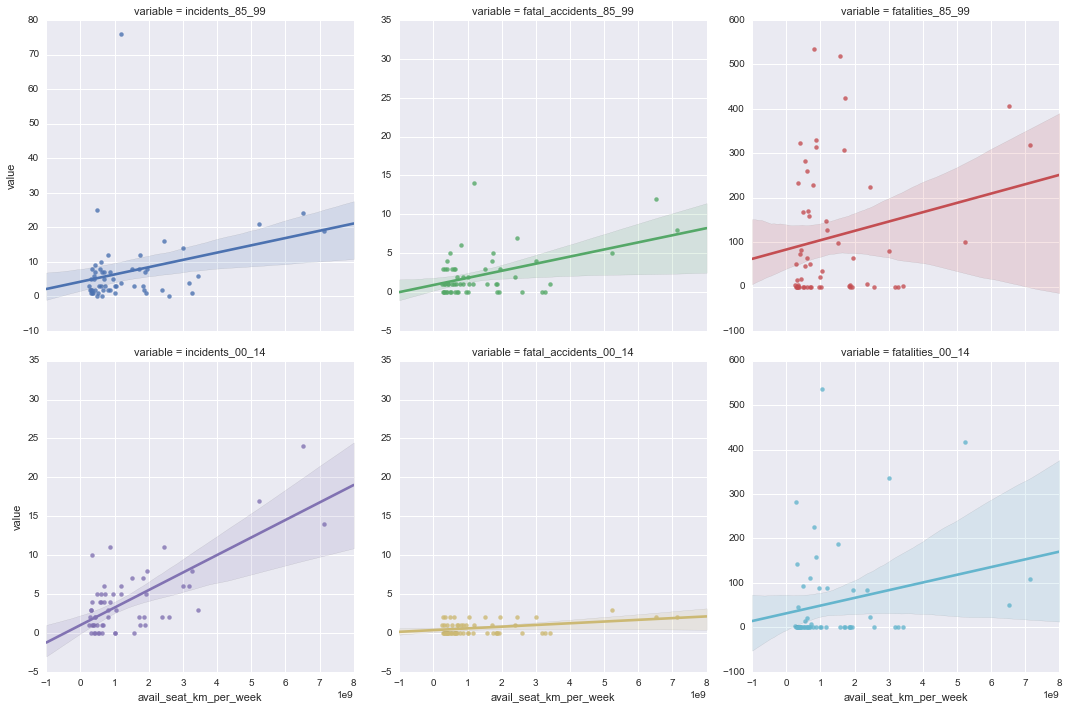

In [10]:
sns.lmplot(x='avail_seat_km_per_week', y='value', data=safety_long,
           col='variable', hue='variable', col_wrap=3, sharey=False);

Visually, it appears that `seaborn`'s linear fitting suggests a relationship between km flown and total incidents and fatal incidents, but not with total fatalities. Unfortunately, at time of writing, `seaborn` does not permit recovery of the fitted parameters from these plots.

<div class="alert alert-success">
<h3>4. Annotating plots in matplotlib</h3>
</div>

The [original blog post](http://fivethirtyeight.com/features/should-travelers-avoid-flying-airlines-that-have-had-crashes-in-the-past/) focuses on whether the number of incidents per airline in 1985-1999 is predictive of the number of incidents per airline in 2000-2014. We will attempt to emulate the plot of incidents per airline in each time period:

![FiveThirtyEight plot](http://i1.wp.com/espnfivethirtyeight.files.wordpress.com/2014/07/silver-datalab-airlines-safety-3.png?quality=90&strip=all&w=575)

#### Adjusting the data

The first thing to note is that the incident data are normalised per 1e9 seat km, which is a sensible measure, and suggested by our scatterplots above. We generate two new DataFrame columns to hold this data:

```python
safety['x_norm'] = 1e9 * safety['incidents_85_99']/safety['avail_seat_km_per_week']
safety['y_norm'] = 1e9 * safety['incidents_00_14']/safety['avail_seat_km_per_week']
```

In [11]:
# Normalise data in this cell
safety['x_norm'] = 1e9 * safety['incidents_85_99']/safety['avail_seat_km_per_week']
safety['y_norm'] = 1e9 * safety['incidents_00_14']/safety['avail_seat_km_per_week']

Next, we want to fit a linear regression to this data. We use the `scipy.stats.linregress` function for this, to capture some regression information:

* `np.polyfit`: [docs](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)
* `stats.linregress`: [docs](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html)

```python
slope, intercept, r_value, p_value, std_err = stats.linregress(safety['x_norm'],
                                                               safety['y_norm'])
```

This returns several useful regression values that we will add to the plot later.

In [12]:
# Fit a linear regression to the normalised data
slope, intercept, r_value, p_value, std_err = stats.linregress(safety['x_norm'],
                                                               safety['y_norm'])

Now we want to create a figure with axes, on which we can plot firstly a line that represent the liear regression fit (in red), and then the normalised data points for each airline's incidents per seat km travelled:

```python
fig, ax = subplots(figsize=(8, 8))
ax.plot(safety['x_norm'], fit[0] * safety['x_norm'] + fit[1], c='red', alpha=0.6)
ax.scatter(safety['x_norm'], safety['y_norm'], s=60, alpha=0.4, c='black')
```

Next we set labels and *x* and *y* axis limits to match the blogpost, and square up the aspect ratio with `ax.set_aspect('equal'):

```python
ax.set_xlabel('1985-99', fontsize=15)
ax.set_ylabel('2000-14', fontsize=15)
ax.set_title('Incidents by Airline Are Slightly Predictable', fontsize=20)
ax.set_xlim((-5, 100))
ax.set_ylim((-5, 100))
ax.set_aspect('equal')
```

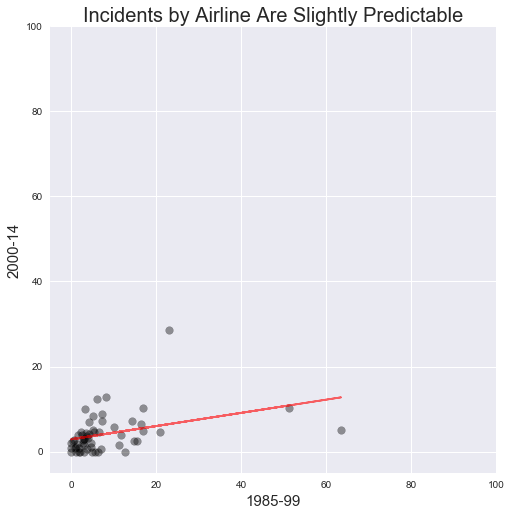

In [13]:
# Plot the figure in this cell
# Plot regression line and scatterplot
fig, ax = subplots(figsize=(8, 8))
ax.plot(safety['x_norm'], slope * safety['x_norm'] + intercept,
        c='red', alpha=0.6)
ax.scatter(safety['x_norm'], safety['y_norm'],
           s=60, alpha=0.4, c='black')

# Add labels and set aspect ratio
ax.set_xlabel('1985-99', fontsize=15)
ax.set_ylabel('2000-14', fontsize=15)
ax.set_title('Incidents by Airline Are Slightly Predictable', fontsize=20)
ax.set_xlim((-5, 100))
ax.set_ylim((-5, 100))
ax.set_aspect('equal')

This corroborates the modest positive correlation that is reported in the blog, but we have yet to identify and label outliers.

Firstly, we will identify all points with more than 20 incidents in the period 1985-1999, placing them in the DataFrame `outliers`:

```python
outliers = safety.loc[safety['incidents_85_99'] > 20,]
outliers
```

In [14]:
# Identify outliers with more than 20 incidents in 1985-99
outliers = safety.loc[safety['x_norm'] > 20,]
outliers

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,x_norm,y_norm
1,Aeroflot*,1197672318,76,14,128,6,1,88,63.456422,5.009718
22,Ethiopian Airlines,488560643,25,5,167,5,2,92,51.170720,10.234144
35,Pakistan International,348563137,8,3,234,10,2,46,22.951366,28.689207
55,Xiamen Airlines,430462962,9,1,82,2,0,0,20.907722,4.646160


Now we want to add text for each of these table rows, at the *x*,*y* position corresponding to their datapoints. To do this, we iterate over each row in `outliers` in turn, using the `.itertuples()` method to get the data in more tractable form, noting that `'x_norm'` and `'y_norm'` are in columns 9 and 10, respectively. The airline name is in column 1.

We do some formatting on the fly here - replacing spaces in airline names with `\n` - a line feed - to get some neater formatting, using the `.replace()` string method.

To avoid confusion/interfering with `x` and `y` variables, we use `x_lbl` and `y_lbl` to be clear we're talking about label coordinates.

Finally in the loop, we add the label text to the scatterplot, with `ax.annotate()`. We set the fontsize to be a little larger than default, and align the text at its centre point vertically with the datapoint, for neatness. We also offset the *x* position by 1 to avoid direct overlap.

```python
for row in outliers.itertuples():
    x_lbl = float(row[9])
    y_lbl = float(row[10])
    label = str(row[1]).replace(' ', '\n')
    ax.annotate(label, (x_lbl + 1, y_lbl), fontsize=12,
                verticalalignment='center')    
```

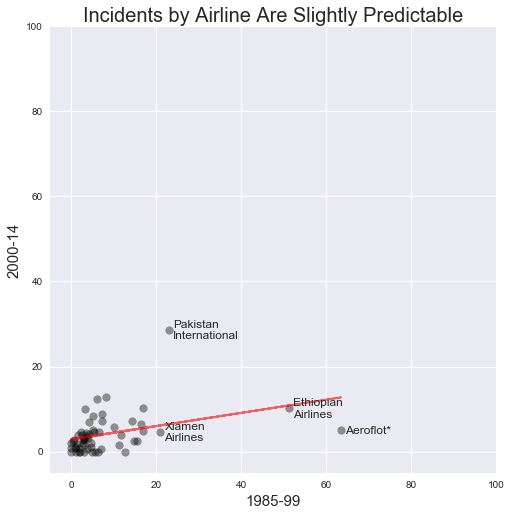

In [15]:
# Annotate the outliers and render the figure
for row in outliers.itertuples():
    x_lbl = float(row[9])
    y_lbl = float(row[10])
    label = str(row[1]).replace(' ', '\n')
    ax.annotate(label, (x_lbl + 1, y_lbl), fontsize=12,
                verticalalignment='center')
fig

To take the figure slightly beyond that in the blog, we will add information about the regression to the upper right quadrant (which currently looks a bit empty). Again we will use `ax.annotate()`.

Here, we're creating a list of strings, one per line in the final annotation.

`matplotlib` lets us use $\LaTeX$ strings, which are indicated here enclosed in `$`, as inline $\LaTeX$ strings. We're also using the `string.format()` idiom from `Python`, to format floating point numbers with a suitable number of decimal places.

<div class="alert alert-warning">
<b>NOTE:</b> To escape curly braces in Python's format strings, use the double braces: <b>{{</b> and <b>}}</b>.
</div>

```python
annotstr = '\n'.join(['REGRESSION',
                      '$y = {0:.2f}x + {1:.2f}$'.format(slope, intercept),
                      '$r^2: {0:.2f}$'.format(r_value**2),
                      '$\mathrm{{p-value}}: {0:.4f}$'.format(p_value),
                      '$\mathrm{{S.E}}. of estimate: {0:.3f}$'.format(std_err)])
ax.annotate(annotstr, (60, 70), fontsize=12, color='red')
```

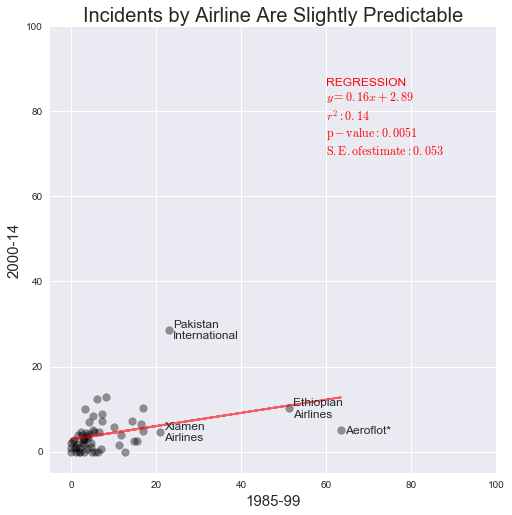

In [16]:
annotstr = '\n'.join(['REGRESSION',
                      '$y = {0:.2f}x + {1:.2f}$'.format(slope, intercept),
                      '$r^2: {0:.2f}$'.format(r_value**2),
                      '$\mathrm{{p-value}}: {0:.4f}$'.format(p_value),
                      '$\mathrm{{S.E. of estimate}}: {0:.3f}$'.format(std_err)])
ax.annotate(annotstr, (60, 70), fontsize=12, color='red')
fig